# Imports:

In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score, precision_score
import warnings
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from matplotlib import rcParams
from termcolor import colored as cl 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import math

# Import and Read the Chicago Food Inspections CSV File:

In [81]:
data = pd.read_csv('food-inspections-2.csv')

In [11]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2352683,CHIPOTLE MEXICAN GRILL,CHIPOTLE MEXICAN GRILL,2670642.0,Restaurant,Risk 1 (High),1025 W ADDISON ST,CHICAGO,IL,60613.0,2019-12-04T00:00:00.000,License Re-Inspection,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.947118,-87.655381,"{'latitude': '-87.6553811622124', 'longitude':..."
1,2352734,CHILI'S T-I,CHILI'S (T1-B14),34169.0,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666.0,2019-12-04T00:00:00.000,Canvass,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,42.008536,-87.914428,"{'latitude': '-87.91442843927047', 'longitude'..."
2,2352713,NICK'S FIRE GRILL STEAK & LEMONADE INC.,NICK'S FIRE GRILL STEAK & LEMONADE INC.,2699090.0,NaN,Risk 1 (High),2900 W 63RD ST,CHICAGO,IL,60629.0,2019-12-04T00:00:00.000,License,Not Ready,NaN,41.779190,-87.695892,"{'latitude': '-87.69589237398256', 'longitude'..."
3,2352701,TAQUERIA BLUE LINE INC.,NaN,2703436.0,Restaurant,Risk 1 (High),3401 W BELMONT AVE,CHICAGO,IL,60618.0,2019-12-04T00:00:00.000,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.939168,-87.712546,"{'latitude': '-87.71254599117191', 'longitude'..."
4,2352727,PORTAGE PARK DAY NURSERY,MOSAIC EARLY CHILDHOOD ACADEMY,2215815.0,Children's Services Facility,Risk 1 (High),5332-5334 W ADDISON ST,CHICAGO,IL,60641.0,2019-12-04T00:00:00.000,Canvass,Pass,NaN,41.946065,-87.760722,"{'latitude': '-87.76072227616888', 'longitude'..."


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196825 entries, 0 to 196824
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    196825 non-null  int64  
 1   DBA Name         196825 non-null  object 
 2   AKA Name         194367 non-null  object 
 3   License #        196808 non-null  float64
 4   Facility Type    192057 non-null  object 
 5   Risk             196756 non-null  object 
 6   Address          196825 non-null  object 
 7   City             196686 non-null  object 
 8   State            196783 non-null  object 
 9   Zip              196775 non-null  float64
 10  Inspection Date  196825 non-null  object 
 11  Inspection Type  196824 non-null  object 
 12  Results          196825 non-null  object 
 13  Violations       144559 non-null  object 
 14  Latitude         196135 non-null  float64
 15  Longitude        196135 non-null  float64
 16  Location         196135 non-null  obje

# EDA: 
## Let's Take a Closer Look at our Data

In [83]:
# Analyze the frequency of the dataset per year, month and day

data['year']=data['Inspection Date'].apply(lambda x:x.split('-')[0])
data['month']=data['Inspection Date'].apply(lambda x:x.split('-')[1])
data['day']=data['Inspection Date'].apply(lambda x:x.split('-')[2].split('T')[0])

# Visualizations: 
## A. Counting the Number of Inspections

Text(0.5, 0, 'Month')

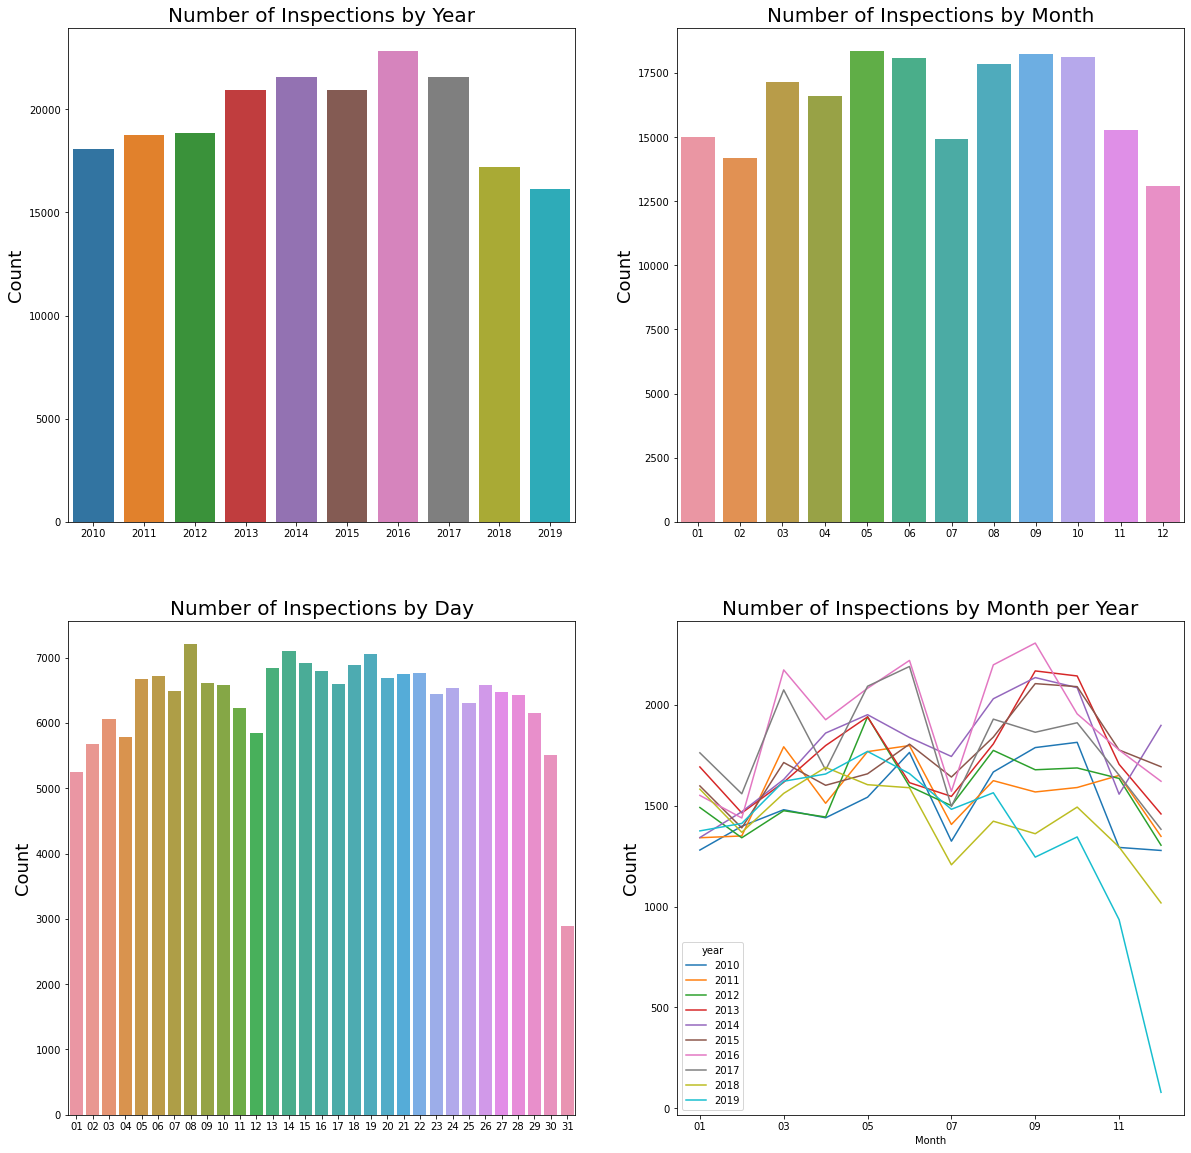

In [14]:
# See the number of inspections across day, month and year

fig,ax=plt.subplots(2,2,figsize=(20,20))
x=data.year.value_counts().index
y=data.year.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,0])
ax[0,0].set_title("Number of Inspections by Year",size=20)
ax[0,0].set_ylabel('Count',size=18)
ax[0,0].set_xlabel('')

x=data.month.value_counts().index
y=data.month.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,1])
ax[0,1].set_title("Number of Inspections by Month",size=20)
ax[0,1].set_ylabel('Count',size=18)
ax[0,1].set_xlabel('')

x=data.day.value_counts().index
y=data.day.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,0])
ax[1,0].set_title("Number of Inspections by Day",size=20)
ax[1,0].set_ylabel('Count',size=18)
ax[1,0].set_xlabel('')

data.groupby(['year','month'])['Inspection ID'].agg('count').unstack('year').plot(ax=ax[1,1])
ax[1,1].set_title("Number of Inspections by Month per Year",size=20)
ax[1,1].set_ylabel('Count',size=18)
ax[1,1].set_xlabel('Month')

## B. Risk Distributions

Text(0, 0.5, 'Latitude')

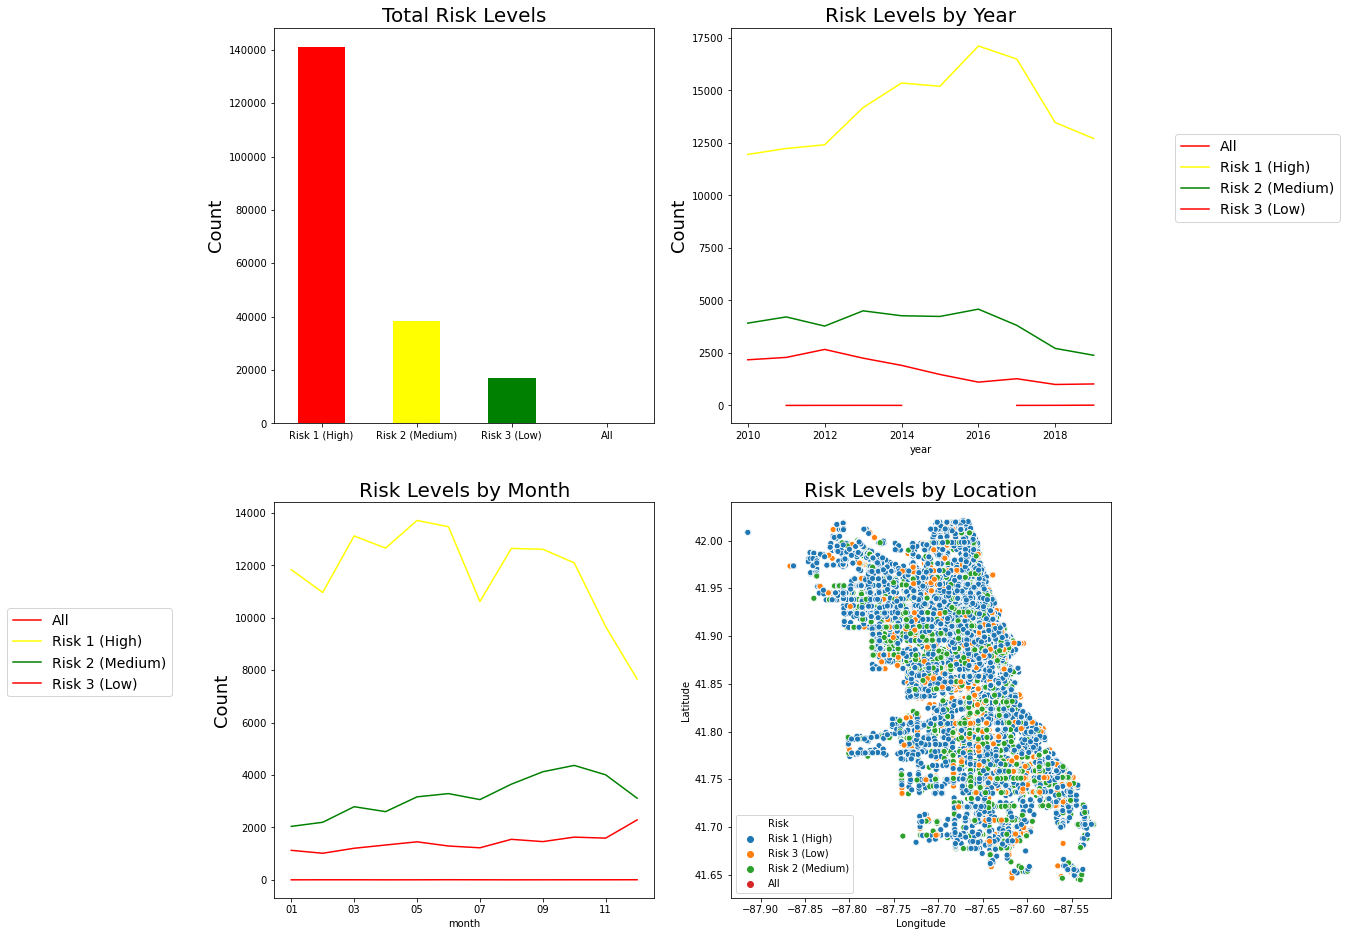

In [84]:
# See risk distributions by month, year and location

fig,ax=plt.subplots(2,2,figsize=(15,16))
data.Risk.value_counts().plot(kind='bar',color=['red','yellow','green'],ax=ax[0,0])
ax[0,0].tick_params(axis='x',labelrotation=360)
ax[0,0].set_title("Total Risk Levels",size=20)
ax[0,0].set_ylabel('Count',size=18)


data.groupby(['year','Risk'])['Inspection ID'].agg('count').unstack('Risk').plot(ax=ax[0,1],color=['red','yellow','green'])
ax[0,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,0.75))
ax[0,1].set_title("Risk Levels by Year",size=20)
ax[0,1].set_ylabel('Count',size=18)

data.groupby(['month','Risk'])['Inspection ID'].agg('count').unstack('Risk').plot(ax=ax[1,0],color=['red','yellow','green'])
ax[1,0].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(-0.25,0.75))
ax[1,0].set_title("Risk Levels by Month",size=20)
ax[1,0].set_ylabel('Count',size=18)

sns.scatterplot(x='Longitude',y='Latitude',hue='Risk' ,data=data, ax=ax[1,1])
ax[1,1].set_title("Risk Levels by Location",size=20)
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_ylabel('Latitude')

## C. Risk Distribution By Facility Type


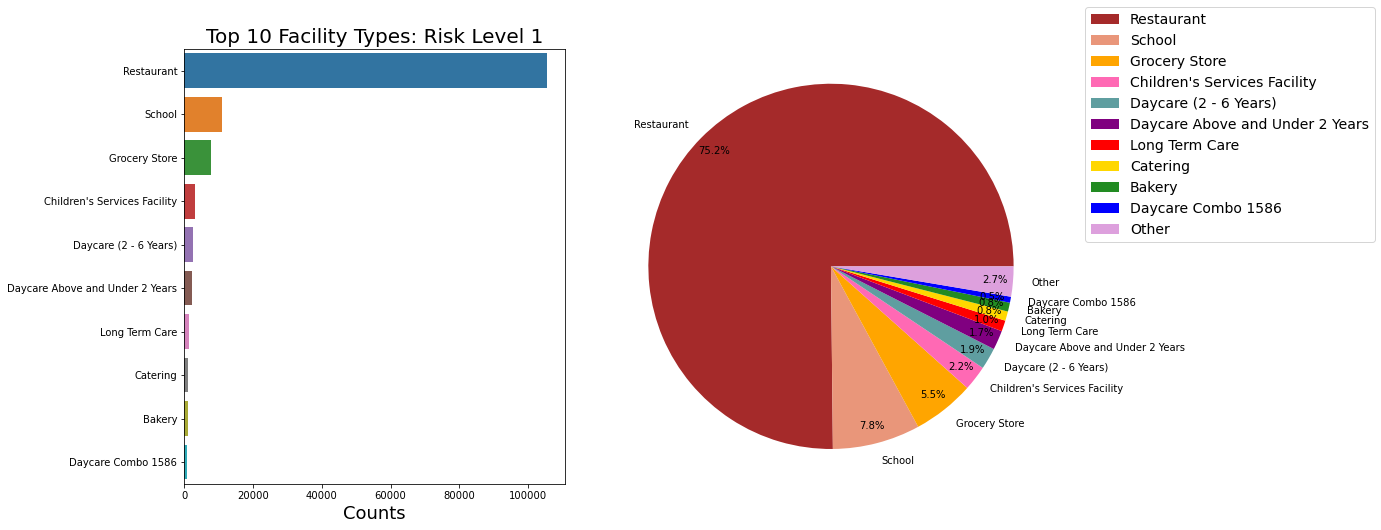

In [16]:
# See which facility types are most at risk across all 4 levels of risk 

data_risk1=data[data.Risk=='Risk 1 (High)']
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=data_risk1['Facility Type'].value_counts()[:10],y=data_risk1['Facility Type'].value_counts()[:10].index,ax=ax[0])
ax[0].set_title("Top 10 Facility Types: Risk Level 1",size=20)
ax[0].set_xlabel('Counts',size=18)
count=data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False)
groups=list(data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False).index[:10])
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
ax[1].set_ylabel('')
ax[1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,1.2))

## Risk 2 (Medium)

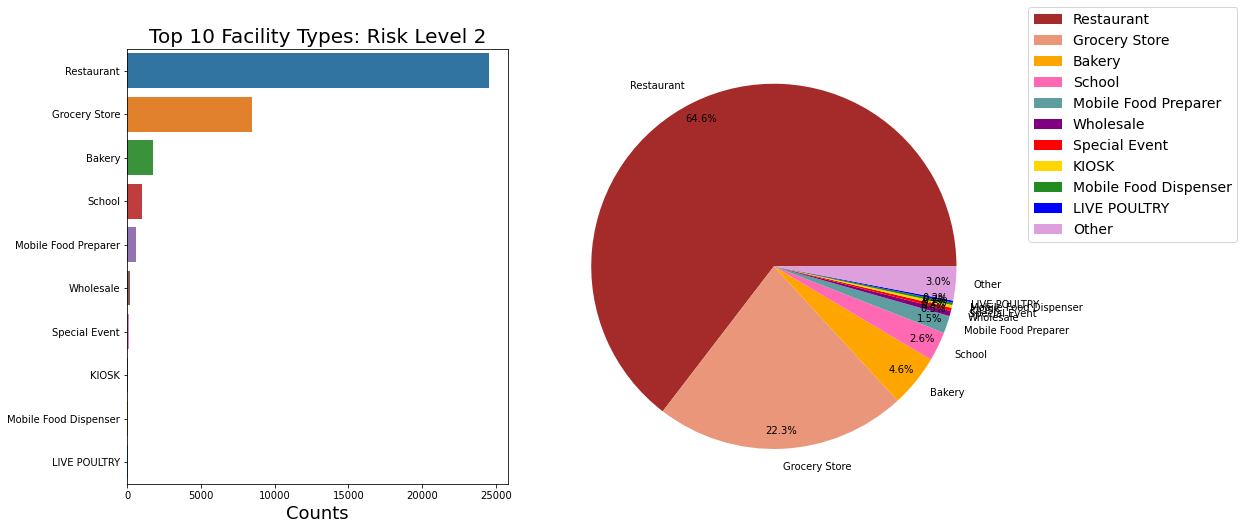

In [17]:
data_risk1=data[data.Risk=='Risk 2 (Medium)']
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=data_risk1['Facility Type'].value_counts()[:10],y=data_risk1['Facility Type'].value_counts()[:10].index,ax=ax[0])
ax[0].set_title("Top 10 Facility Types: Risk Level 2",size=20)
ax[0].set_xlabel('Counts',size=18)
count=data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False)
groups=list(data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False).index[:10])
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
ax[1].set_ylabel('')
ax[1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,1.2))

## Risk 3 (Low)

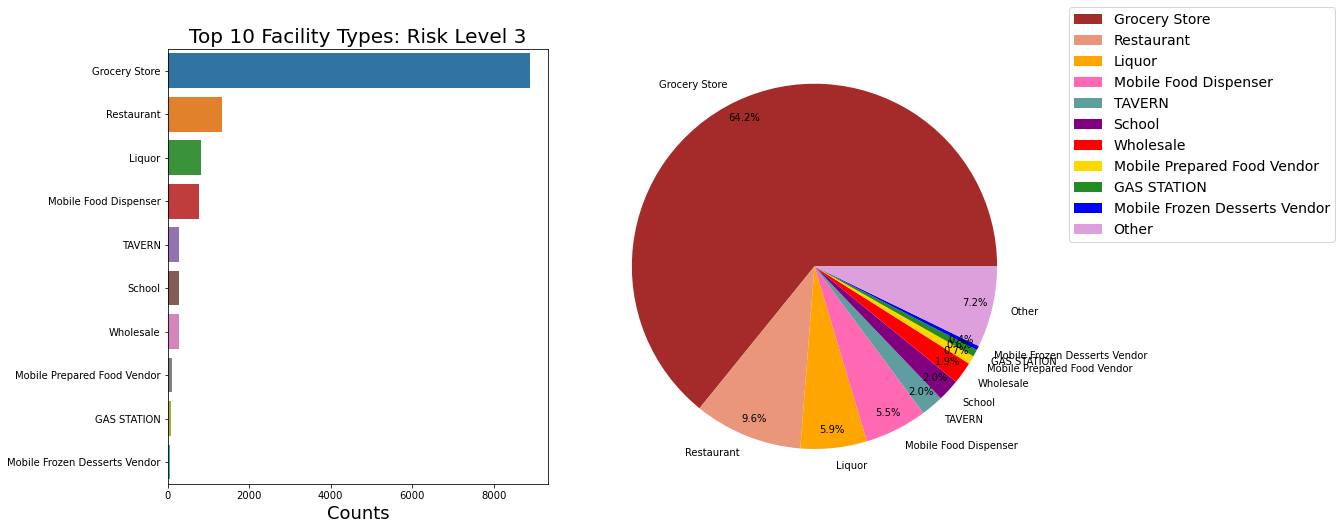

In [18]:
data_risk1=data[data.Risk=='Risk 3 (Low)']
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=data_risk1['Facility Type'].value_counts()[:10],y=data_risk1['Facility Type'].value_counts()[:10].index,ax=ax[0])
ax[0].set_title("Top 10 Facility Types: Risk Level 3",size=20)
ax[0].set_xlabel('Counts',size=18)
count=data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False)
groups=list(data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False).index[:10])
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
ax[1].set_ylabel('')
ax[1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,1.2))

## Risk 4 (All)

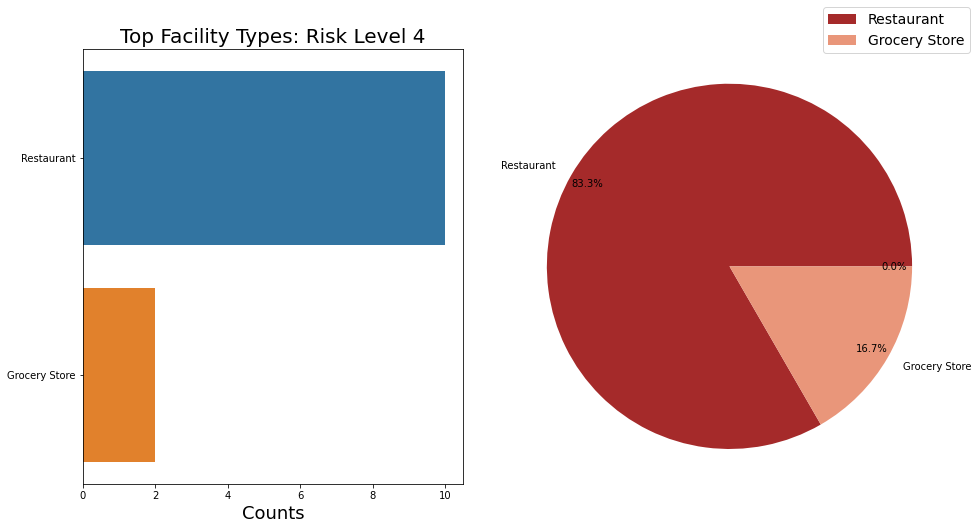

In [19]:
data_risk1=data[data.Risk=='All']
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=data_risk1['Facility Type'].value_counts()[:10],y=data_risk1['Facility Type'].value_counts()[:10].index,ax=ax[0])
ax[0].set_title("Top Facility Types: Risk Level 4",size=20)
ax[0].set_xlabel('Counts',size=18)
count=data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False)
groups=list(data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False).index[:10])
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
ax[1].set_ylabel('')
ax[1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,1.2))

## D. Distribution of Target: Results

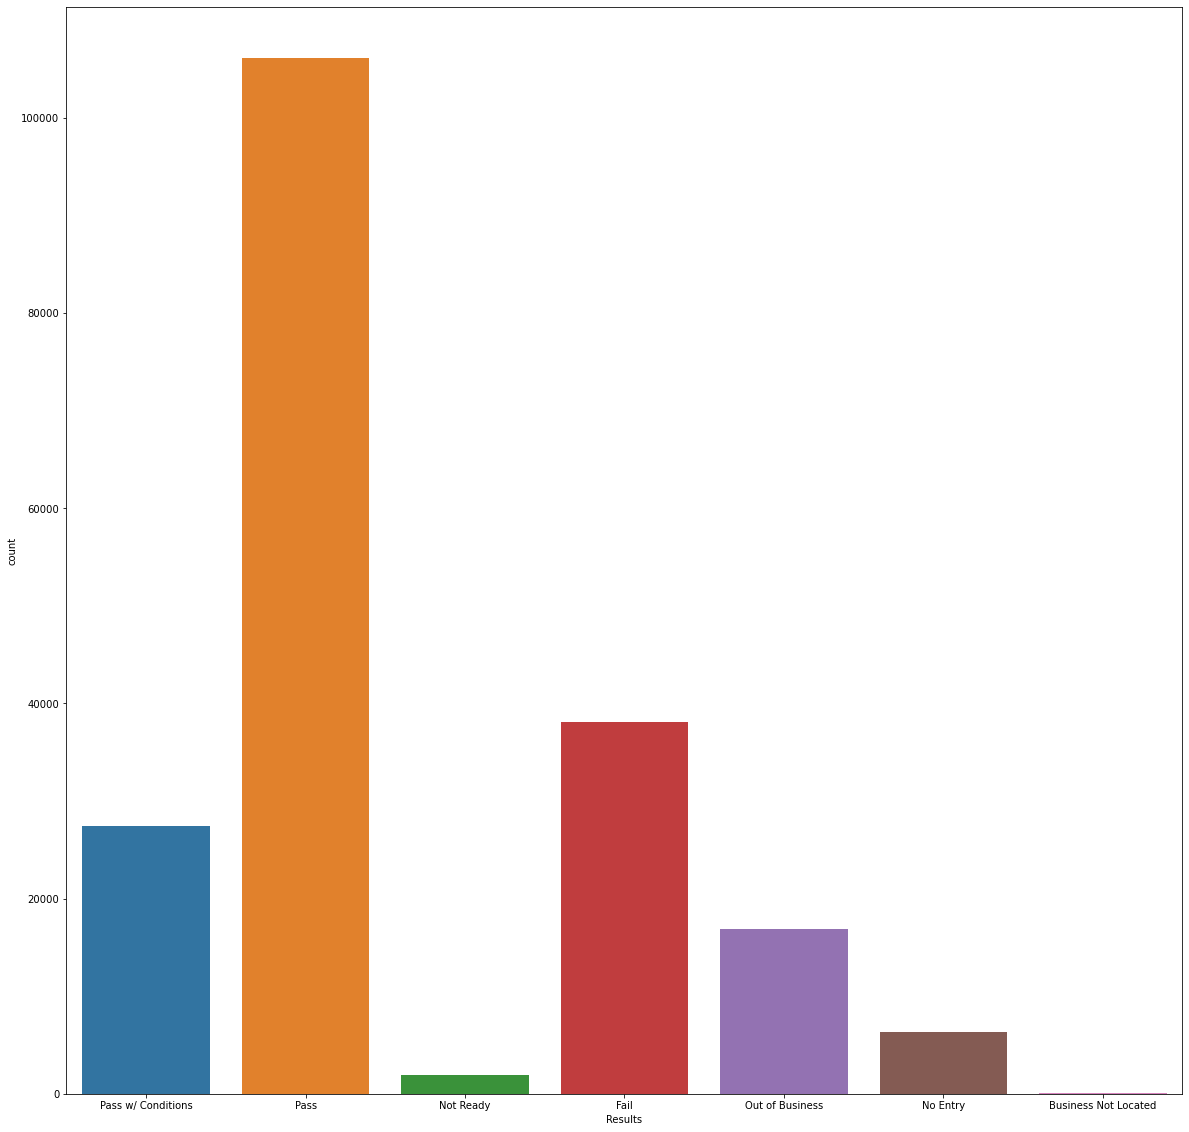

In [20]:
# Our target variable is Results, here we can easily see the distribution
# Find out it is multi-class...and we want binary!

fig_dims = (20,20)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=data,x="Results",ax=ax)
plt.show()

In [ ]:
# Pie chart representation- just another visual

data["Results"].value_counts().head(7).plot(kind='pie',autopct='%1.1f%%',figsize=(20,20)).legend()

In [21]:
# Breakdown of final Results

data["Results"].value_counts()

Pass                    106066
Fail                     38087
Pass w/ Conditions       27448
Out of Business          16919
No Entry                  6324
Not Ready                 1912
Business Not Located        69
Name: Results, dtype: int64

# Feature Engineering
## A. Make into Binary Classification

In [22]:
# The Results output has multiple categories
# Will convert multi class into Binary class
# Converting known and unknown with 0,1

data['Results'].replace({'Pass': 1, 'Fail' : 0,'Pass w/ Conditions' : 0,'Out of Business' : 0,'No Entry' : 0,'Not Ready' : 0,'Business Not Located':0}, inplace=True )

In [ ]:
# Pie Chart visual

data["Results"].value_counts().head(7).plot(kind='pie',autopct='%1.1f%%',figsize=(20,20)).legend()

## B. Convert Categorical Variables into Numerical Variables

In [24]:
# Convert Risk from low, med, high to numbers 1, 2, 3

data['Risk'].value_counts(normalize=True)

Risk 1 (High)      0.717279
Risk 2 (Medium)    0.195323
Risk 3 (Low)       0.087240
All                0.000158
Name: Risk, dtype: float64

In [ ]:
# Pie Chart visual

data["Risk"].value_counts().head(7).plot(kind='pie',autopct='%1.1f%%',figsize=(20,20)).legend()

In [26]:
data['Risk'].replace({'0': 0, 'Risk 3 (Low)' : 1,'Risk 2 (Medium)' : 2,'Risk 1 (High)' : 3,'All' : 4}, inplace=True )

In [27]:
data['Risk'].value_counts(normalize=True)

3.0    0.717279
2.0    0.195323
1.0    0.087240
4.0    0.000158
Name: Risk, dtype: float64

## C. Take a Closer Look at Unique Values:
## Risk

In [28]:
# These next two functions allow us to see how each unique value 
# (for Risk and Zip Codes) is interacting with our Target Results

list_value=data.Risk.unique()

In [ ]:
for x in list_value:
"""This Function will find all of the unique Risk items types in the dataframe"""
      try:
        rslt_df = data[data['Risk'] == x] 
        fig, ax = plt.subplots()
        rslt_df['Results'].value_counts().plot(ax=ax, kind='bar')
        plt.title(x)
      except:
        continue

## Zip Codes

In [29]:
list_value=data.Zip.unique()

In [ ]:
for x in list_value:
"""This function will find all the unique Zip Codes items in the dataframe """
  try:
    rslt_df = data[data['Zip'] == x] 
    fig, ax = plt.subplots()
    rslt_df['Results'].value_counts().plot(ax=ax, kind='bar')
    plt.title(x)
  except:
    continue

In [ ]:
# Check data

data.head()

## D. Remove Useless Columns

In [31]:
data=data.drop(columns=['Inspection ID','DBA Name','AKA Name','License #','Address','City','State','Inspection Date','month','day','year'])

In [32]:
data

,Facility Type,Risk,Zip,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,Restaurant,3.0,60613.0,License Re-Inspection,0,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.947118,-87.655381,"{'latitude': '-87.6553811622124', 'longitude':..."
1,Restaurant,3.0,60666.0,Canvass,1,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,42.008536,-87.914428,"{'latitude': '-87.91442843927047', 'longitude'..."
2,NaN,3.0,60629.0,License,0,NaN,41.779190,-87.695892,"{'latitude': '-87.69589237398256', 'longitude'..."
3,Restaurant,3.0,60618.0,License,0,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.939168,-87.712546,"{'latitude': '-87.71254599117191', 'longitude'..."
4,Children's Services Facility,3.0,60641.0,Canvass,1,NaN,41.946065,-87.760722,"{'latitude': '-87.76072227616888', 'longitude'..."
...,...,...,...,...,...,...,...,...,...
196820,Restaurant,3.0,60657.0,License Re-Inspection,1,NaN,41.938007,-87.644755,"{'latitude': '-87.6447545707008', 'longitude':..."
196821,Restaurant,3.0,60611.0,Canvass,0,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.898431,-87.628009,"{'latitude': '-87.6280091630558', 'longitude':..."
196822,Restaurant,3.0,60613.0,License Re-Inspection,1,NaN,41.961606,-87.675967,"{'latitude': '-87.67596676683779', 'longitude'..."
196823,Restaurant,3.0,60634.0,License Re-Inspection,1,NaN,41.938443,-87.768318,"{'latitude': '-87.76831838068422', 'longitude'..."


## E. Find Missing Values

In [33]:
# We want to know how many columns have missing values


data[data.isnull().any(axis=1)].head()

,Facility Type,Risk,Zip,Inspection Type,Results,Violations,Latitude,Longitude,Location
2,NaN,3.0,60629.0,License,0,NaN,41.779190,-87.695892,"{'latitude': '-87.69589237398256', 'longitude'..."
4,Children's Services Facility,3.0,60641.0,Canvass,1,NaN,41.946065,-87.760722,"{'latitude': '-87.76072227616888', 'longitude'..."
5,Restaurant,3.0,60605.0,Canvass Re-Inspection,1,NaN,41.874481,-87.629357,"{'latitude': '-87.62935653990546', 'longitude'..."
6,Restaurant,3.0,60613.0,License Re-Inspection,0,NaN,41.947118,-87.655381,"{'latitude': '-87.6553811622124', 'longitude':..."
9,Children's Services Facility,3.0,60641.0,Canvass,1,NaN,41.954877,-87.727505,"{'latitude': '-87.72750513009342', 'longitude'..."


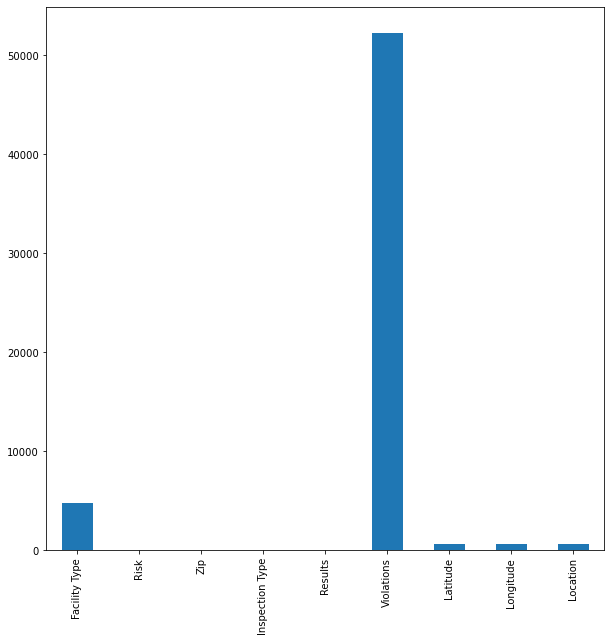

In [34]:
# This is a better visual to see where exactly the majority of our missing values lie

missing_cols=data.isnull().sum()
missing_cols.plot.bar(figsize=(10,10))
plt.show()

In [35]:
data=data.drop(columns=['Violations','Facility Type','Location'])

In [36]:
imputer  = SimpleImputer(missing_values = np.nan, strategy='mean')

# Numerical Values

imputer.fit(data[['Latitude', 'Longitude','Zip']])
data[['Latitude', 'Longitude','Zip']] = imputer.transform(data[['Latitude', 'Longitude','Zip']])

# Strings

data['Risk']=data['Risk'].fillna('0')
data['Inspection Type']=data['Inspection Type'].fillna('0')

In [ ]:
# We want this to be blank, proves we have no missing values

missing_cols=data.isnull().sum()
missing_cols.plot.bar(figsize=(10,10))
plt.show()

# Feature Distributions:

## Heat Map

In [37]:
data.head()

,Risk,Zip,Inspection Type,Results,Latitude,Longitude
0,3,60613.0,License Re-Inspection,0,41.947118,-87.655381
1,3,60666.0,Canvass,1,42.008536,-87.914428
2,3,60629.0,License,0,41.779190,-87.695892
3,3,60618.0,License,0,41.939168,-87.712546
4,3,60641.0,Canvass,1,41.946065,-87.760722


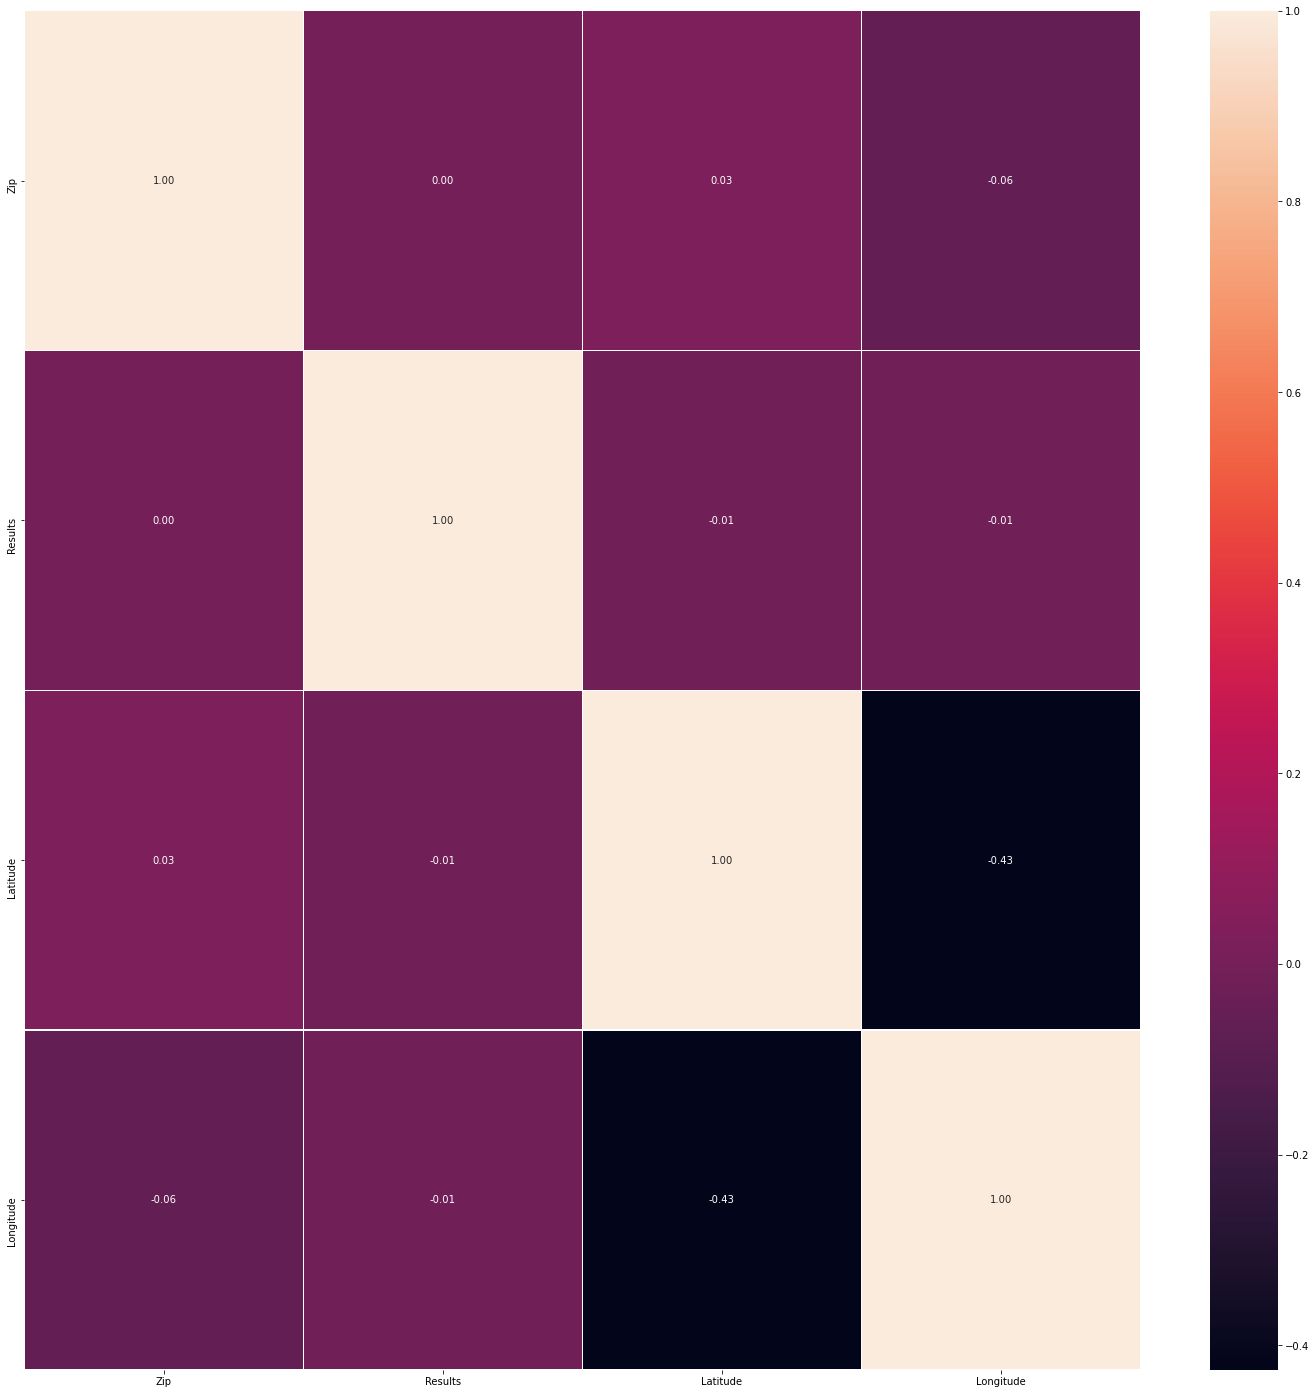

In [38]:
plt.figure(figsize = (25,25))
sns.heatmap(data = data.corr(), annot=True, linewidths=.3, fmt="1.2f")
plt.show()

## Histograms

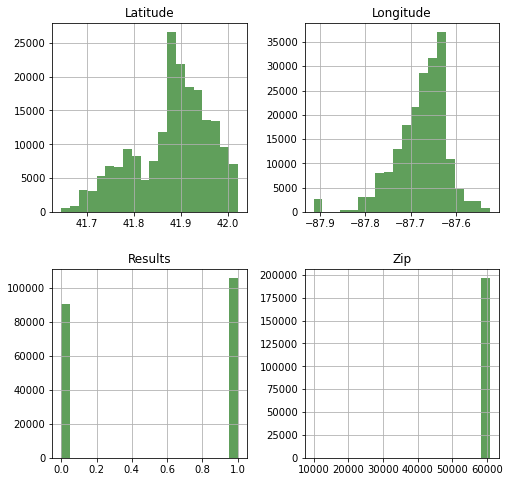

In [39]:
data.hist(figsize=(8,8),bins=20,color="#107009AA")
plt.show()

## PairPlot

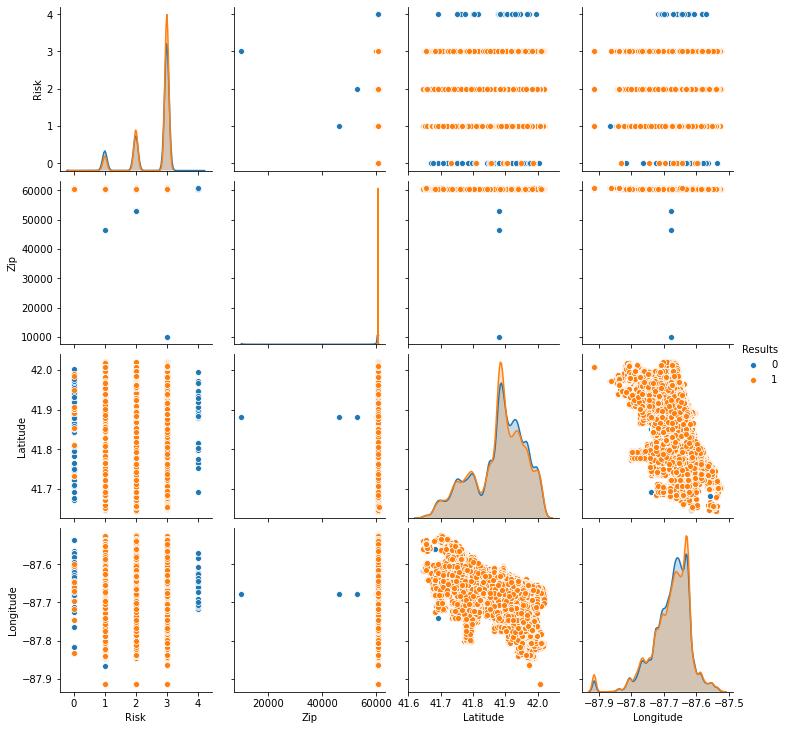

In [40]:
sns.pairplot(data,hue='Results')

In [41]:
data

,Risk,Zip,Inspection Type,Results,Latitude,Longitude
0,3,60613.0,License Re-Inspection,0,41.947118,-87.655381
1,3,60666.0,Canvass,1,42.008536,-87.914428
2,3,60629.0,License,0,41.779190,-87.695892
3,3,60618.0,License,0,41.939168,-87.712546
4,3,60641.0,Canvass,1,41.946065,-87.760722
...,...,...,...,...,...,...
196820,3,60657.0,License Re-Inspection,1,41.938007,-87.644755
196821,3,60611.0,Canvass,0,41.898431,-87.628009
196822,3,60613.0,License Re-Inspection,1,41.961606,-87.675967
196823,3,60634.0,License Re-Inspection,1,41.938443,-87.768318


## Distance

In [42]:
# Finding location means

means = data.groupby('Zip')['Results'].mean()
data['Zip'] = data['Zip'].map(means)

In [43]:
# Calculating the distance between two points using their latitude and longitude
# Vectorized Haversine Function
# 41.881832, -87.623177 (Latitude and Longitude of the center of Chicago)
# found the distances of each position based on this distance from the center of Chicago


def distance(x,y):
    lat1, lon1 = (41.881832,-87.623177)
    lat2, lon2 = (x,y)
    radius = 6371 # km 
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d
data['distance'] = data.apply(lambda row:  distance(row['Latitude'], row['Longitude']) ,axis=1)

In [44]:
data=data.drop(columns=['Latitude','Longitude'])

In [45]:
# Created a new column called distance

data

,Risk,Zip,Inspection Type,Results,distance
0,3,0.510634,License Re-Inspection,0,7.733066
1,3,0.660870,Canvass,1,27.905659
2,3,0.583422,License,0,12.905867
3,3,0.562374,License,0,9.764051
4,3,0.540929,Canvass,1,13.436754
...,...,...,...,...,...
196820,3,0.494049,License Re-Inspection,1,6.496558
196821,3,0.599053,Canvass,0,1.888609
196822,3,0.510634,License Re-Inspection,1,9.887381
196823,3,0.582768,License Re-Inspection,1,13.560148


In [46]:
obj_data=data.select_dtypes(include=['object']).copy()

In [47]:
data=data.drop(obj_data,1)
data.head()

,Zip,Results,distance
0,0.510634,0,7.733066
1,0.660870,1,27.905659
2,0.583422,0,12.905867
3,0.562374,0,9.764051
4,0.540929,1,13.436754


## Make Dummy Variables

In [48]:
obj_data=pd.get_dummies(obj_data)

In [49]:
data=data.join(obj_data)

In [56]:
data

,Zip,Results,distance,Risk_1.0,Risk_2.0,Risk_3.0,Risk_4.0,Risk_0,Inspection Type_0,Inspection Type_1315 license reinspection,...,Inspection Type_expansion,Inspection Type_finish complaint inspection from 5-18-10,Inspection Type_fire complaint,Inspection Type_license,Inspection Type_license task 1474,Inspection Type_no entry,Inspection Type_out ofbusiness,Inspection Type_sfp/complaint,Inspection Type_task force,Inspection Type_task force(1470) liquor tavern
0,0.510634,0,7.733066,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.660870,1,27.905659,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.583422,0,12.905867,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.562374,0,9.764051,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.540929,1,13.436754,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196820,0.494049,1,6.496558,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196821,0.599053,0,1.888609,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196822,0.510634,1,9.887381,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196823,0.582768,1,13.560148,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
print(data.columns)

Index(['Zip', 'Results', 'distance', 'Risk_1.0', 'Risk_2.0', 'Risk_3.0',
       'Risk_4.0', 'Risk_0', 'Inspection Type_0',
       'Inspection Type_1315 license reinspection',
       ...
       'Inspection Type_expansion',
       'Inspection Type_finish complaint inspection from 5-18-10',
       'Inspection Type_fire complaint', 'Inspection Type_license',
       'Inspection Type_license task 1474', 'Inspection Type_no entry',
       'Inspection Type_out ofbusiness', 'Inspection Type_sfp/complaint',
       'Inspection Type_task force',
       'Inspection Type_task force(1470) liquor tavern'],
      dtype='object', length=117)


# Modeling:

In [57]:
y=data[['Results']]

In [58]:
X=data.drop(columns=['Results'])

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [60]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
sc = MinMaxScaler()
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

# 1. Logistic Regression Model

In [62]:
classifer = LogisticRegression(random_state=0)
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)

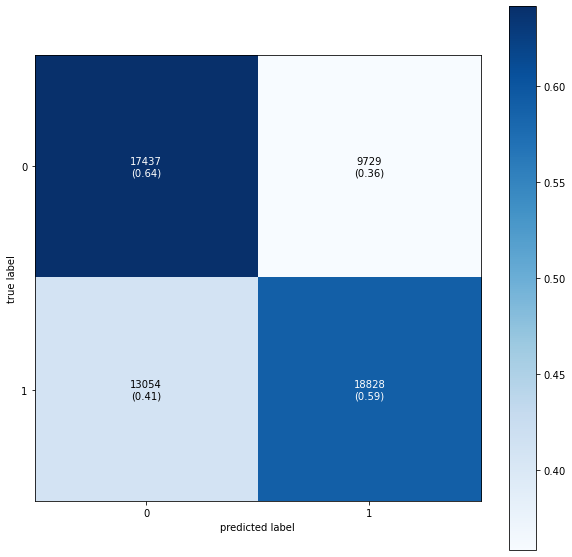

In [63]:
#Plotting Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,figsize=(10, 10),show_absolute=True,show_normed=True,colorbar=True)
plt.show()

Accuracy value is  0.6141613602492887
Precision value is  0.659312953041286
Recall value is  0.5905526629446083
F1 value is  0.6230414136567449


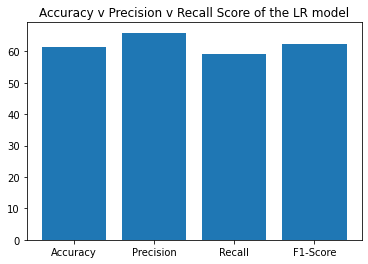

In [64]:
# Plotting Accuracy vs Precision vs Recall vs F1

Accuracy= accuracy_score(y_test, y_pred) *  100
Precision= precision_score(y_test, y_pred) *  100 
Recall= recall_score(y_test, y_pred) *  100
F1 = 2 * (Precision * Recall) / (Precision + Recall)
print('Accuracy value is ',Accuracy/100)
print('Precision value is ',Precision/100)
print('Recall value is ',Recall/100)
print('F1 value is ',F1/100)


# Graphing the Evaluation Metrics

Eval_Metrics = [Accuracy, Precision, Recall,F1 ]
Metric_Names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
Metrics_pos = np.arange(len(Metric_Names))
plt.bar(Metrics_pos, Eval_Metrics)
plt.xticks(Metrics_pos, Metric_Names)
plt.title('Accuracy v Precision v Recall Score of the LR model')
plt.show()

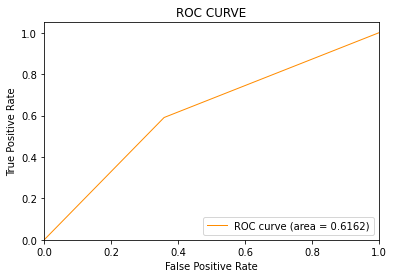

In [65]:
#ROC Curve

fpr1, tpr1, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# 2. KNN Models

## A. KNN and Best K 

In [ ]:
# K Nearest Neighbor classifier, applying cross validation for parameter tuning to decide the best parameter of K only

k_range=list(range(5,15))
k_scores = []
for k in k_range:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validation Accuracy')

# Best Value of K will be used after that

max_value = max(k_scores)
max_index = k_scores.index(max_value)
print(max_index)

knn = KNeighborsClassifier(n_neighbors=k_range[max_index])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Plotting Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,figsize=(10, 10),show_absolute=True,show_normed=True,colorbar=True)
plt.show()

# Plotting Accuracy vs Precision vs Recall vs F1

Accuracy= accuracy_score(y_test, y_pred) *  100
Precision= precision_score(y_test, y_pred) *  100 
Recall= recall_score(y_test, y_pred) *  100
F1 = 2 * (Precision * Recall) / (Precision + Recall)
print('Accuracy value is ',Accuracy/100)
print('Precision value is ',Precision/100)
print('Recall value is ',Recall/100)
print('F1 value is ',F1/100)

# Graphing the Evaluation Metrics

Eval_Metrics = [Accuracy, Precision, Recall,F1 ]
Metric_Names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
Metrics_pos = np.arange(len(Metric_Names))
plt.bar(Metrics_pos, Eval_Metrics)
plt.xticks(Metrics_pos, Metric_Names)
plt.title('Accuracy v Precision v Recall Score of KNN Model')
plt.show()

## B. KNN and GridSearch CV

In [ ]:
# K Nearest Neighbor classifier, applying GridSearch CV for Efficient Parameter tuning

from sklearn.model_selection import GridSearchCV
k_range = list(range(12,15))
weight_options=['uniform','distance']
param_grid = dict(n_neighbors=k_range,weights=weight_options)
knn = KNeighborsClassifier()
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(X_train,y_train)
print(grid.best_params_)

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 13,weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Plotting Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,figsize=(10, 10),show_absolute=True,show_normed=True,colorbar=True)
plt.show()

# Plotting Accuracy vs Precision vs Recall vs F1

Accuracy= accuracy_score(y_test, y_pred) *  100
Precision= precision_score(y_test, y_pred) *  100 
Recall= recall_score(y_test, y_pred) *  100
F1 = 2 * (Precision * Recall) / (Precision + Recall)
print('Accuracy value is ',Accuracy/100)
print('Precision value is ',Precision/100)
print('Recall value is ',Recall/100)
print('F1 value is ',F1/100)

# Graphing the Evaluation Metrics

Eval_Metrics = [Accuracy, Precision, Recall,F1 ]
Metric_Names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
Metrics_pos = np.arange(len(Metric_Names))
plt.bar(Metrics_pos, Eval_Metrics)
plt.xticks(Metrics_pos, Metric_Names)
plt.title('Accuracy v Precision v Recall Score of KNN Model')
plt.show()

## C. KNN and RandomizedSearch CV

In [ ]:
# K Nearest Neighbor classifier, applying RandomizedSearch CV to make it faster

from sklearn.model_selection import RandomizedSearchCV
k_range = list(range(5,25))
weight_options=['uniform','distance']
param_grid = dict(n_neighbors=k_range,weights=weight_options)
knn = KNeighborsClassifier()
grid=RandomizedSearchCV(knn,param_grid,cv=10,scoring='accuracy',n_iter=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'],weights=grid.best_params_['weights'])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Plotting Confusion Matrix
                                                                                                  
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,figsize=(10, 10),show_absolute=True,show_normed=True,colorbar=True)
plt.show()

#Plotting Accuracy vs Precision vs Recall vs F1
                                                                                                  
Accuracy= accuracy_score(y_test, y_pred) *  100
Precision= precision_score(y_test, y_pred) *  100 
Recall= recall_score(y_test, y_pred) *  100
F1 = 2 * (Precision * Recall) / (Precision + Recall)
print('Accuracy value is ',Accuracy/100)
print('Precision value is ',Precision/100)
print('Recall value is ',Recall/100)
print('F1 value is ',F1/100)
                                                                                                  
# Graphing the Evaluation Metrics
                                                                                                  
Eval_Metrics = [Accuracy, Precision, Recall,F1 ]
Metric_Names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
Metrics_pos = np.arange(len(Metric_Names))
plt.bar(Metrics_pos, Eval_Metrics)
plt.xticks(Metrics_pos, Metric_Names)
plt.title('Accuracy v Precision v Recall Score of KNN Model')
plt.show()

# 3. Naive Bayes

In [66]:
NB=GaussianNB()
NB= NB.fit(X_train , y_train)
y_pred = NB.predict(X_test)

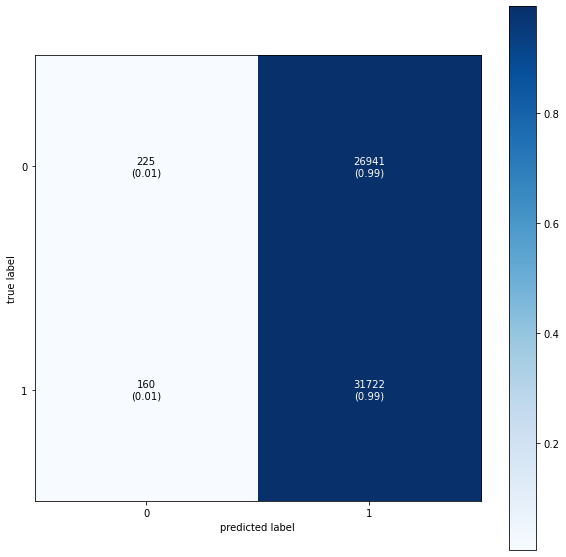

In [67]:
# Plotting Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,figsize=(10, 10),show_absolute=True,show_normed=True,colorbar=True)
plt.show()

Accuracy value is  0.5410344126812086
Precision value is  0.5407497059475308
Recall value is  0.9949814942600841
F1 value is  0.7006902645093599


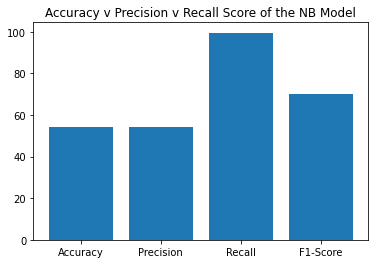

In [68]:
# Plotting Accuracy vs Precision vs Recall vs F1

Accuracy= accuracy_score(y_test, y_pred) *  100
Precision= precision_score(y_test, y_pred) *  100 
Recall= recall_score(y_test, y_pred) *  100
F1 = 2 * (Precision * Recall) / (Precision + Recall)
print('Accuracy value is ',Accuracy/100)
print('Precision value is ',Precision/100)
print('Recall value is ',Recall/100)
print('F1 value is ',F1/100)

# Graphing the Evaluation Metrics

Eval_Metrics = [Accuracy, Precision, Recall,F1 ]
Metric_Names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
Metrics_pos = np.arange(len(Metric_Names))
plt.bar(Metrics_pos, Eval_Metrics)
plt.xticks(Metrics_pos, Metric_Names)
plt.title('Accuracy v Precision v Recall Score of the NB Model')
plt.show()

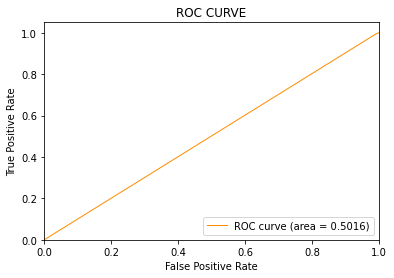

In [69]:
# ROC Curve

fpr1, tpr1, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# 4. Random Forest

In [70]:
classifer = RandomForestClassifier(n_estimators= 10,criterion='entropy', random_state=0 )
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)

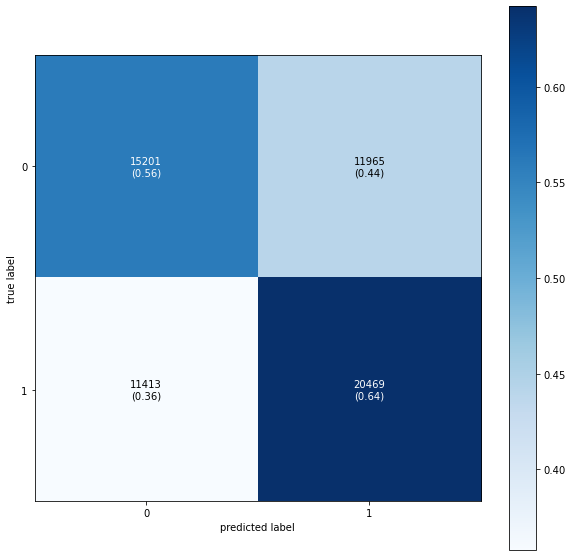

In [71]:
# Plotting Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,figsize=(10, 10),show_absolute=True,show_normed=True,colorbar=True)
plt.show()

Accuracy value is  0.6040848123560493
Precision value is  0.6310969969784793
Recall value is  0.6420237124396211
F1 value is  0.6365134647677093


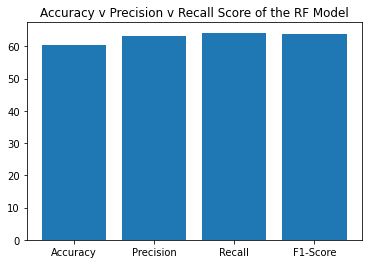

In [72]:
# Plotting Accuracy vs Precision vs Recall vs F1

Accuracy= accuracy_score(y_test, y_pred) *  100
Precision= precision_score(y_test, y_pred) *  100 
Recall= recall_score(y_test, y_pred) *  100
F1 = 2 * (Precision * Recall) / (Precision + Recall) 
print('Accuracy value is ',Accuracy/100)
print('Precision value is ',Precision/100)
print('Recall value is ',Recall/100)
print('F1 value is ',F1/100)

# Graphing Evaluation Metrics

Eval_Metrics = [Accuracy, Precision, Recall,F1 ]
Metric_Names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
Metrics_pos = np.arange(len(Metric_Names))
plt.bar(Metrics_pos, Eval_Metrics)
plt.xticks(Metrics_pos, Metric_Names)
plt.title('Accuracy v Precision v Recall Score of the RF Model')
plt.show()

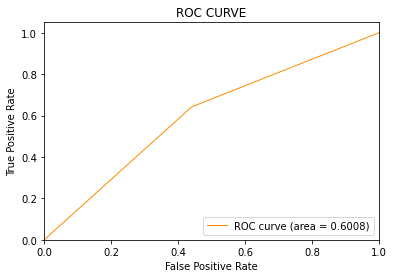

In [73]:
#ROC Curve

fpr1, tpr1, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# 5. Decision Tree

In [74]:
classifer = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)

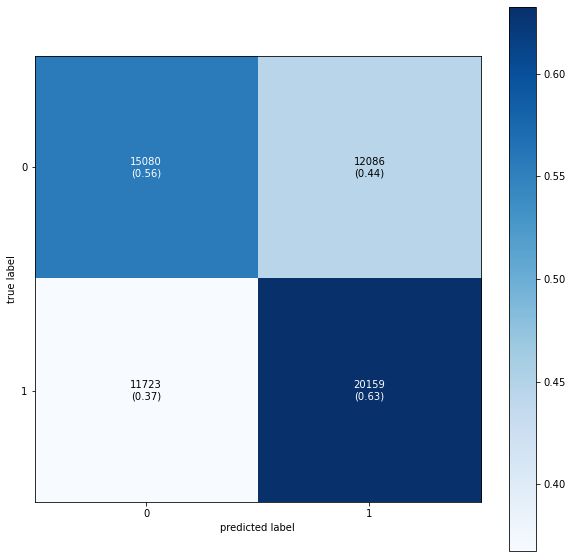

In [75]:
# Plotting Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,figsize=(10, 10),show_absolute=True,show_normed=True,colorbar=True)
plt.show()

In [ ]:
# Plotting Accuracy vs Precision vs Recall vs F1

rcParams['figure.figsize'] = (10,10)
Accuracy= accuracy_score(y_test, y_pred) *  100
Precision= precision_score(y_test, y_pred) *  100 
Recall= recall_score(y_test, y_pred) *  100
F1 = 2 * (Precision * Recall) / (Precision + Recall) 
print('Accuracy value is ',Accuracy/100)
print('Precision value is ',Precision/100)
print('Recall value is ',Recall/100)
print('F1 value is ',F1/100)

# Graphing Evaluation Metrics

Eval_Metrics = [Accuracy, Precision, Recall,F1 ]
Metric_Names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
Metrics_pos = np.arange(len(Metric_Names))
plt.bar(Metrics_pos, Eval_Metrics)
plt.xticks(Metrics_pos, Metric_Names)
plt.title('Accuracy v Precision v Recall Score of the DT Model')
plt.show()

In [ ]:
#ROC Curve

fpr1, tpr1, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
feature_names = X.columns
target_names = str(data['Results'].unique().tolist())
rcParams['figure.figsize'] = (100,100)
plot_tree(classifer, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True, fontsize=50)
plt.savefig('tree_visualization.png') 